At the end of this step, you will understand the concepts of underfitting and overfitting, and you will be able to apply these ideas to make your models more accurate.

# Experimenting With Different Models

Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions.  But what alternatives do you have for models?

You can see in scikit-learn's [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth.  Recall from [the first lesson in this course](https://www.kaggle.com/dansbecker/how-models-work) that a tree's depth is a measure of how many splits it makes before coming to a prediction.  This is a relatively shallow tree

![Depth 2 Tree](http://i.imgur.com/R3ywQsR.png)

In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf.  As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses.  If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses.  Splitting each of those again would create 8 groups.  If we keep doubling the number of groups by adding more splits at each level, we'll have \\(2^{10}\\) groups of houses by the time we get to the 10th level. That's 1024 leaves.  

When we divide the houses amongst many leaves, we also have fewer houses in each leaf.  Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called **overfitting**, where a model matches the training data almost perfectly, but does poorly in validation and other new data.  On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.  

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.  

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting.  Visually, we want the low point of the (red) validation curve in the figure below.

![underfitting_overfitting](http://i.imgur.com/AXSEOfI.png)

# Example
There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes.  But the *max_leaf_nodes* argument provides a very sensible way to control overfitting vs underfitting.  The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for *max_leaf_nodes*:


In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

The data is loaded into **train_X**, **val_X**, **train_y** and **val_y** using the code you've already seen (and which you've already written).

In [4]:
# Data Loading Code Runs At This Point
import pandas as pd
    
# Load data
melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

We can use a for-loop to compare the accuracy of models built with different values for *max_leaf_nodes.*

In [10]:
import numpy as np

In [13]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

In [19]:
max_leaf_nodes_array = np.linspace(5.,5000.,50,dtype= "int32")
max_leaf_nodes_array

array([   5,  106,  208,  310,  412,  514,  616,  718,  820,  922, 1024,
       1126, 1228, 1330, 1432, 1534, 1636, 1737, 1839, 1941, 2043, 2145,
       2247, 2349, 2451, 2553, 2655, 2757, 2859, 2961, 3063, 3165, 3267,
       3368, 3470, 3572, 3674, 3776, 3878, 3980, 4082, 4184, 4286, 4388,
       4490, 4592, 4694, 4796, 4898, 5000], dtype=int32)

In [45]:
# compare MAE with differing values of max_leaf_nodes
my_maes= {}

for max_leaf_nodes in max_leaf_nodes_array:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    my_maes.update({max_leaf_nodes: my_mae})


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 106  		 Mean Absolute Error:  248602
Max leaf nodes: 208  		 Mean Absolute Error:  249763
Max leaf nodes: 310  		 Mean Absolute Error:  244255
Max leaf nodes: 412  		 Mean Absolute Error:  243572
Max leaf nodes: 514  		 Mean Absolute Error:  245209
Max leaf nodes: 616  		 Mean Absolute Error:  243407
Max leaf nodes: 718  		 Mean Absolute Error:  243506
Max leaf nodes: 820  		 Mean Absolute Error:  244188
Max leaf nodes: 922  		 Mean Absolute Error:  246761
Max leaf nodes: 1024  		 Mean Absolute Error:  247411
Max leaf nodes: 1126  		 Mean Absolute Error:  248844
Max leaf nodes: 1228  		 Mean Absolute Error:  249265
Max leaf nodes: 1330  		 Mean Absolute Error:  249675
Max leaf nodes: 1432  		 Mean Absolute Error:  251229
Max leaf nodes: 1534  		 Mean Absolute Error:  251582
Max leaf nodes: 1636  		 Mean Absolute Error:  251556
Max leaf nodes: 1737  		 Mean 

In [43]:
min(my_maes, key=my_maes.get) # Best possible depth xd

616

In [7]:
import matplotlib.pyplot as plt

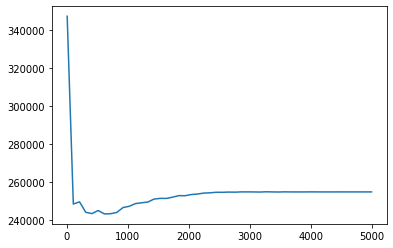

In [22]:
plt.plot(max_leaf_nodes_array, my_maes)



Of the options listed, 500 is the optimal number of leaves.

---

# Conclusion

Here's the takeaway: Models can suffer from either:
- **Overfitting:** capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or 
- **Underfitting:** failing to capture relevant patterns, again leading to less accurate predictions. 

We use **validation** data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one. 



# Your Turn

Try **[optimizing the model you've previously built](https://www.kaggle.com/kernels/fork/1259126)**.